# Task 2: Check using all available ratings, if the three quality features VF, VU, and VD are perceptual dimensions (i.e. factors). File to use: Gaming_Video_Quality_dataset.xlsx

### Step 1: Library imports and reading in data

In [1]:
# install.packages('dplyr')      # processing 
# install.packages('gdata')      # file reading
# install.packages('Hmisc')      # correlation matricies
# install.packages('ggfortify')  # PCA visualization
# install.packages('psych')      # KMO test and PCA prediction

In [2]:
library(dplyr)     # processing
library(readxl)    # reading in data
library(Hmisc)     # correlation matricies
library(ggfortify) # PCA visualization
library(psych)     # KMO test and PCA prediction


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Warning message:
"package 'ggfortify' was built under R version 3.6.2"
Attaching package: 'psych'

The following object is masked from 'package:Hmisc':

    describe

The following objects are masked from 'package:ggplot2':

    %+%, alpha



In [3]:
# read in data set
gaming_data <- read_excel("datasets/DB01_gaming_video_quality_dataset.xlsx")[c(9:11)]
head(gaming_data)

VF,VU,VD
1.3,1.6,5.7
1.2,4.6,6.3
2.3,2.8,4.4
3.0,2.0,4.8
3.0,2.0,5.5
2.2,2.0,4.0


### Step 2: Checking if PCA can be applied directly => KMO test

In [4]:
# KMO test: PCA only fine if overall MSA > 0.5
paste0('KMO test for gaming data set:')
KMO(gaming_data)

[1] "KMO test for gaming data set:"

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = gaming_data)
Overall MSA =  0.55
MSA for each item = 
  VF   VU   VD 
0.53 0.54 0.72 

#### As Measure of Sampling Adequacy > 0.5 for every item & overall in every data set [even in whole data set]
#### => PCA can be performed directly

### Step 3: Compute correlation matricies and their eigenvalues
#### Note: Look at high correlation pairs to presume factors

In [5]:
# Not strictly linear relationships between the variables 
# Hence: Compute no Pearson but Spearman correlation matricies
corr_data <- rcorr(as.matrix(gaming_data), type=c("spearman"))

In [6]:
# pro forma: display p values of variables in data set
paste0('p value matrix of variables in gaming data set:')
corr_data$P

[1] "p value matrix of variables in gaming data set:"

,VF,VU,VD
VF,NA,0,0
VU,0,NA,0
VD,0,0,NA


In [7]:
# Correlation matrix => note the correlations !
paste0('Correlation matrix of variables in gaming data set:')
corr_data <- corr_data$r
corr_data

[1] "Correlation matrix of variables in gaming data set:"

,VF,VU,VD
VF,1.0000000,0.4335250,0.1901738
VU,0.4335250,1.0000000,0.1634967
VD,0.1901738,0.1634967,1.0000000


In [8]:
# Compute eigenvalues
paste0('Eigenvalues of gaming data correlation matrix:')
eigenvalues <- eigen(as.matrix(corr_data))$values
eigenvalues

[1] "Eigenvalues of gaming data correlation matrix:"

[1] 1.5477743 0.8867324 0.5654933

### Step 4: Decide on number of factors based on scree plot

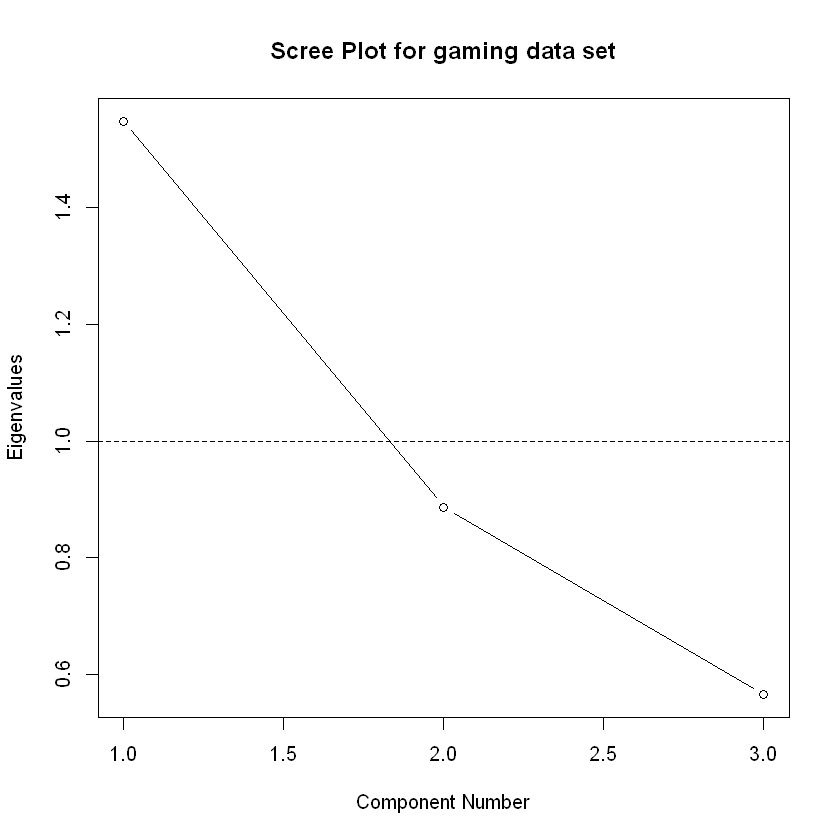

In [9]:
# Display scree plots for data set, decision: retain TWO factors
plot(eigenvalues, main="Scree Plot for gaming data set", ylab="Eigenvalues", xlab="Component Number",type='b') # b: plot points AND lines
abline(h=1, lty=2) # lty = line type (2 for dashed)

#### Note: As the point of inflexion is located at Component number = 2, we set the number of retained factors to 2

#### Only taking one component / conducting Kaiser's criterion would be not the best plan here (as correlation between VD & PC1 low, as observed in correlation matrix), and because PC plot tells a lot:

### Step 5: Conduct Principal Component Analysis based on previous steps

#### As we see above and remember from previous computations on the data set, there is merely minor correlation between the possible factors. Therefore, we would decide for orthogonal rotation intuitively, which is perfectly confirmed by plotting the PC plot => orthogonal rotation.

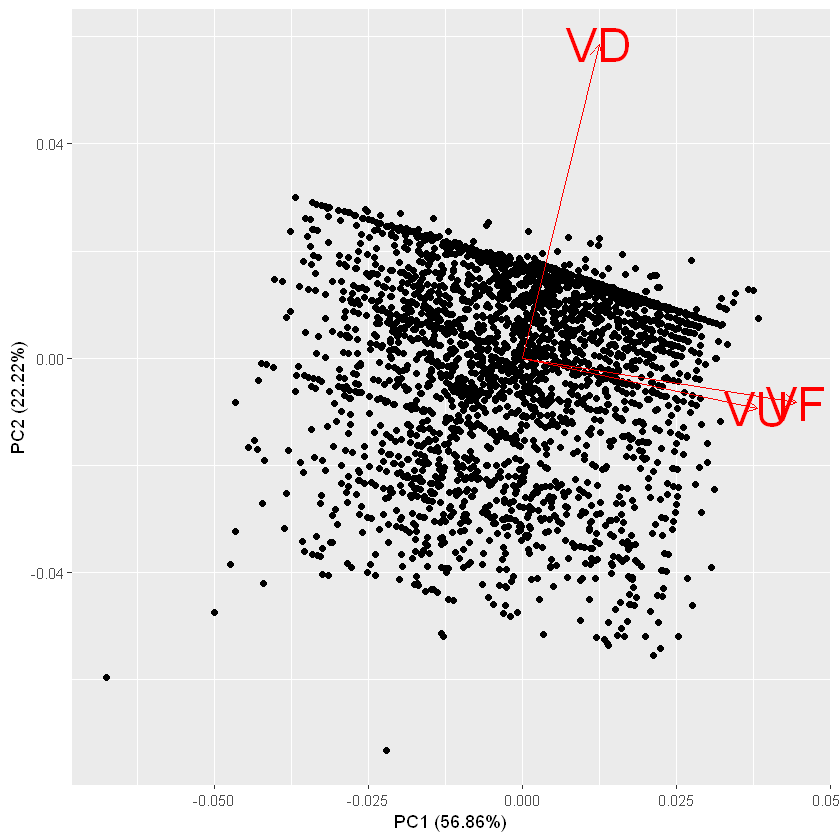

In [10]:
# by plotting: visible that there is very little correlation between both PCs => orthogonal rotation, e.g. varimax
autoplot(prcomp(gaming_data),
         loadings = TRUE, loadings.colour = 'red',
         loadings.label = TRUE, loadings.label.size = 10)

In [11]:
# conduct PCA with two PCs
pca_gaming_data <- principal(gaming_data, nfactor=2, covar=FALSE, impute='mean', rotate='varimax')
pca_gaming_data

Principal Components Analysis
Call: principal(r = gaming_data, nfactors = 2, rotate = "varimax", 
    covar = FALSE, impute = "mean")
Standardized loadings (pattern matrix) based upon correlation matrix
    RC1  RC2   h2      u2 com
VF 0.84 0.13 0.72 0.27998   1
VU 0.85 0.09 0.73 0.27179   1
VD 0.07 1.00 1.00 0.00045   1

                       RC1  RC2
SS loadings           1.43 1.02
Proportion Var        0.48 0.34
Cumulative Var        0.48 0.82
Proportion Explained  0.58 0.42
Cumulative Proportion 0.58 1.00

Mean item complexity =  1
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.16 
 with the empirical chi square  516.7  with prob <  NA 

Fit based upon off diagonal values = 0.7

### Are VF, VU & VD perceptual dimensions / factors? => Most likely not (reason: see component plot and PCA results for factor loadings)

In [12]:
# Optional bonus: Compute predicted component scores based on previous PCA results
reduced_gaming_data <- predict(pca_gaming_data, gaming_data)
head(reduced_gaming_data)

RC1,RC2
-2.263066,0.83926748
-1.033774,1.25063411
-1.171002,-0.41761329
-1.289021,-0.02560982
-1.369446,0.61366846
-1.522809,-0.74466341


### Step 6: Compute Cronbach's Alpha

In [13]:
original_gaming_alpha <- psych::alpha(gaming_data, check.keys=TRUE)$total$raw_alpha
reduced_gaming_alpha <- psych::alpha(reduced_gaming_data, check.keys=TRUE)$total$raw_alpha
paste0('Original Cronbach Alpha: ', round(original_gaming_alpha, digits=3), ' => ', 'Reduced Cronbach Alpha: ', round(reduced_gaming_alpha, digits=3))

Warning message in psych::alpha(reduced_gaming_data, check.keys = TRUE):
"Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name."Warning message in matrix(unlist(drop.item), ncol = 10, byrow = TRUE):
"data length [16] is not a sub-multiple or multiple of the number of columns [10]"

[1] "Original Cronbach Alpha: 0.525 => Reduced Cronbach Alpha: 0"